### Machine Learning 

> Dataset: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [1]:
# Importações das bibliotecas
import pandas as pd
import numpy as np
import glob
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn import metrics

> 1. Junte os dois conjunto de dados de Vinho tinto de vinho branco separa esses dados em treinamento e teste, utilizando o k-means crie uma categoria para cada tipo de vinho utilizando os dados de treinamento para definir as categorias, classifique os vinhos de teste e compara o rotulo original deles com o rotulo do kmeans (30 pontos)

#### Organização dos dados

In [18]:
db_red=pd.read_csv('winequality-red.csv', sep =';')
db_white=pd.read_csv('winequality-white.csv', sep =';')

In [19]:
# Adiciona um label para cada tipo de vinho
label_aux = [], []

def label(df, value):
    label_aux = []
    for label in range(len(df)): label_aux.append(value)
    df['label'] = label_aux
     
label(db_red, 0) #'red'
label(db_white, 1) #'white'

In [20]:
# Junta os dois conjuntos de dados 
df = pd.merge(db_red, db_white, how = 'outer')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


#### Solução 01: Função sklearn K-means 

In [37]:
# Extrai as features e os labels
features, label = [], []
def features_extraction(d):
    features_list = []
    for i in range(len(d)):
        features.append(d[i])
        label.append(d[i][12])
    return features, label

d = df.to_numpy().tolist()
features, label = features_extraction(d)

In [101]:
# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.3)

In [115]:
kmeans = KMeans(init="random", n_clusters=2, max_iter=500, random_state=None)
kmeans.fit(X_train)

acc_Kmeans = metrics.accuracy_score(y_test, kmeans.predict(X_test))
print("ACC K-Means: {}".format(acc_Kmeans))

print(np.array(y_test[:100]))
print(np.array(kmeans.labels_[:100]))

ACC K-Means: 0.7933333333333333
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1.]
[1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1
 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0]


#### Solução 02: K-means apresentado em sala

In [117]:
# Divisão de treinos e teste
treinamento=df.sample(frac=.8,random_state=200)
teste=df.drop(treinamento.index)
treinamento=treinamento.reset_index(drop=True)
teste=teste.reset_index(drop=True)

In [118]:
for i,r in teste.iterrows():
    distancias=[]
    for j,t in treinamento.iterrows():
        dist=np.linalg.norm(r[:12]-t[:12])
        distancias.append([dist,t[12]])
    distancias.sort(key=lambda x:x[0])
    distancias=distancias[:11]
    classes=[d[1] for d in distancias]
    classe= max(set(classes),key=classes.count)
    teste.at[i,'classe_kmens']=classe

In [119]:
label_teste, label_classe_kmens=[],[]
for i,r in teste.iterrows():
    label_teste.append(r['label'])
    label_classe_kmens.append(r['classe_kmens'])

iguais = [elemento for elemento in label_teste if not(elemento in label_classe_kmens)]
len(iguais)

0

In [120]:
teste

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label,classe_kmens
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,0,0.0
1,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.300000,5,0,0.0
2,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.000000,4,0,0.0
3,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.700000,7,0,0.0
4,6.4,0.40,0.23,1.6,0.066,5.0,12.0,0.99580,3.34,0.56,9.200000,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,6.2,0.36,0.32,4.0,0.036,44.0,92.0,0.98936,3.20,0.50,13.300000,7,1,1.0
1295,5.8,0.23,0.31,4.5,0.046,42.0,124.0,0.99324,3.31,0.64,10.800000,6,1,1.0
1296,5.6,0.20,0.36,2.5,0.048,16.0,125.0,0.99282,3.49,0.49,10.000000,6,1,1.0
1297,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,1,1.0


> 2 - Com essa mesma separação de dados construa uma rede neural que seja treinada com os dados de treinamento e depois classifique os dados de teste como qual o tipo de vinho (50 pontos)

In [72]:
# Extrai as features e os labels
features, label = [], []
def features_extraction(d):
    features_list = []
    for i in range(len(d)):
        features.append(d[i][:12])
        label.append(d[i][12])
    return features, label

d = df.to_numpy().tolist()
features, label = features_extraction(d)

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.3)

In [73]:
def generate_MLP_model(X_train, y_train, X_test):
    classifier = MLPClassifier(hidden_layer_sizes=(100), max_iter=300,
                               activation = 'relu', solver='adam', random_state=1)
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    return predicted

result = generate_MLP_model(X_train, y_train, X_test)

In [74]:
acc_MLP = metrics.accuracy_score(y_test, result)
precision_MLP = metrics.precision_score(y_test, result, average=None)
recall_MLP = metrics.recall_score(y_test, result, average=None)
f1_score_MLP = metrics.f1_score(y_test, result, average=None)

print("Acc MLP: {:.3f}".format(acc_MLP))
print("Precision MLP: {}".format(precision_MLP))
print("Recall MLP: {}".format(recall_MLP))
print("F1 Score MLP: {}".format(f1_score_MLP))

Acc MLP: 0.976
Precision MLP: [0.99090909 0.97218543]
Recall MLP: [0.91213389 0.99728261]
F1 Score MLP: [0.94989107 0.98457411]


[Text(0.5, 1.0, 'MLP'),
 Text(13.060000000000002, 0.5, 'True Label'),
 Text(0.5, -1.340000000000014, 'Predicted Label')]

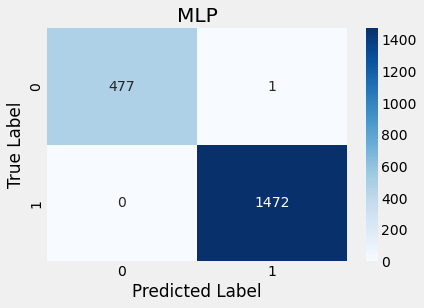

In [146]:
cm = metrics.confusion_matrix(y_test, result)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues').set(title="MLP", ylabel='True Label', xlabel='Predicted Label')

> 3 - Construa uma outra rede neural que utilize os as características do vinho para predizer a sua qualidade

#### Organização dos dados

In [60]:
# Extrai as features e os labels - o label agora será o value da qualidade do vinho
features, label = [], []
def features_extraction(d):
    features_list = []
    for i in range(len(d)):
        features.append(d[i][:11])
        label.append(d[i][11])
    return features, label

d = df.to_numpy().tolist()
features_quality, label_quality = features_extraction(d)

In [134]:
# Divisão dos dados
X_train_Q, X_test_Q, y_train_Q, y_test_Q = train_test_split(features_quality,label_quality,test_size=0.3)

def generate_MLP_model2(X_train, y_train, X_test):
    classifier = MLPClassifier(hidden_layer_sizes=(100,100, 100), max_iter=300,
                               activation = 'relu', solver='adam', random_state=1, 
                               verbose=True)
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    return predicted

result_Q = generate_MLP_model2(X_train_Q, y_train_Q, X_test_Q)

Iteration 1, loss = 2.64204182
Iteration 2, loss = 1.38311503
Iteration 3, loss = 1.27572585
Iteration 4, loss = 1.24694335
Iteration 5, loss = 1.23520368
Iteration 6, loss = 1.23350848
Iteration 7, loss = 1.22438207
Iteration 8, loss = 1.21735755
Iteration 9, loss = 1.20810065
Iteration 10, loss = 1.21314073
Iteration 11, loss = 1.18745126
Iteration 12, loss = 1.18679631
Iteration 13, loss = 1.19100268
Iteration 14, loss = 1.17982521
Iteration 15, loss = 1.16209793
Iteration 16, loss = 1.16187880
Iteration 17, loss = 1.15223021
Iteration 18, loss = 1.15119308
Iteration 19, loss = 1.14371174
Iteration 20, loss = 1.14384314
Iteration 21, loss = 1.13609768
Iteration 22, loss = 1.12162127
Iteration 23, loss = 1.11063710
Iteration 24, loss = 1.10718017
Iteration 25, loss = 1.12464235
Iteration 26, loss = 1.11193424
Iteration 27, loss = 1.11927345
Iteration 28, loss = 1.10920012
Iteration 29, loss = 1.08890917
Iteration 30, loss = 1.11235998
Iteration 31, loss = 1.10863887
Iteration 32, los

In [117]:
print(X_train_Q[0])
print(y_train_Q[0])

[7.4, 0.31, 0.26, 8.6, 0.048, 47.0, 206.0, 0.9964, 3.26, 0.36, 9.1]
5.0


In [135]:
acc_MLP = metrics.accuracy_score(y_test_Q, result_Q)
precision_MLP = metrics.precision_score(y_test_Q, result_Q, average=None)
recall_MLP = metrics.recall_score(y_test_Q, result_Q, average=None)
f1_score_MLP = metrics.f1_score(y_test_Q, result_Q, average=None)

print("Acc MLP: {:.3f}".format(acc_MLP))
print("Precision MLP: {}".format(precision_MLP))
print("Recall MLP: {}".format(recall_MLP))
print("F1 Score MLP: {}".format(f1_score_MLP))

Acc MLP: 0.535
Precision MLP: [0.25       0.34615385 0.63917526 0.50677711 0.47663551 0.
 0.        ]
Recall MLP: [0.08333333 0.13636364 0.48136646 0.79456907 0.16088328 0.
 0.        ]
F1 Score MLP: [0.125      0.19565217 0.54915855 0.61885057 0.24056604 0.
 0.        ]


C:\Users\andressa.moreira\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
aux3, aux4, aux5, aux6, aux7, aux8, ax = 0, 0, 0, 0, 0, 0, 0
for i in y_test_Q:
    if i == 3.0: aux3 = aux3 + 1
    elif i == 4.0: aux4 = aux4 + 1
    elif i == 5.0: aux5 = aux5 + 1 
    elif i == 6.0: aux6 = aux6 + 1 
    elif i == 7.0: aux7 = aux7 + 1
    elif i == 8.0: aux8 = aux8 + 1
    else: print(i)

print(aux3) # 3.0
print(aux4)
print(aux5)
print(aux6)
print(aux7)
print(aux8)
print(ax)

9.0
13
55
646
849
324
62
0


[Text(0.5, 1.0, 'MLP'),
 Text(33.0, 0.5, 'True Label'),
 Text(0.5, 15.0, 'Predicted Label')]

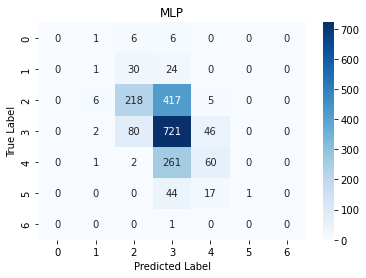

In [106]:
# Labels = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0])
cm = metrics.confusion_matrix(y_test_Q, result_Q)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues').set(title="MLP", ylabel='True Label', xlabel='Predicted Label')

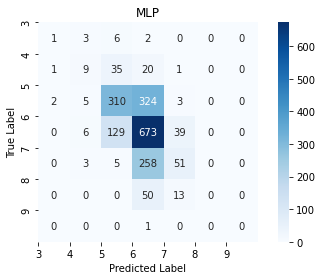

In [138]:
cm = metrics.confusion_matrix(y_test_Q, result_Q)
plt.imshow(cm, interpolation='nearest', cmap=cmap)

targetNames = [3, 4, 5, 6, 7, 8, 9]
tick_marks = [0, 1, 2, 3, 4, 5, 6]

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues').set(title="MLP", ylabel='True Label', xlabel='Predicted Label')

plt.xticks(tick_marks, np.array(targetNames))
plt.yticks(tick_marks, np.array(targetNames))
plt.tight_layout()